In [121]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(34, 2)

In [123]:
df.head()

,Time,domain
0,2022-04-17 16:07:06,blackboard.umbc.edu
1,2022-04-17 16:07:08,blackboard.umbc.edu
2,2022-04-17 16:07:08,webauth.umbc.edu
3,2022-04-17 16:07:08,webauth.umbc.edu
4,2022-04-17 16:07:10,webauth.umbc.edu


In [124]:
df.tail()

,Time,domain
29,2022-04-19 17:53:14,search.yahoo.com
30,2022-04-19 17:53:23,chrome.google.com
31,2022-04-19 17:54:40,search.yahoo.com
32,2022-04-19 17:54:45,search.yahoo.com
33,2022-04-19 17:55:09,search.yahoo.com


In [125]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [126]:
df.dropna( inplace=True)

In [127]:
df.dtypes

Time      object
domain    object
dtype: object

In [128]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [129]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [130]:
df['Time'] = pd.to_datetime(df['Time'])

In [131]:
# df['domain'] = df['domain'].astype(str)

In [132]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [133]:
df.head()

,Time,domain
0,2022-04-17 16:07:06,blackboard.umbc.edu
1,2022-04-17 16:07:08,blackboard.umbc.edu
2,2022-04-17 16:07:08,webauth.umbc.edu
3,2022-04-17 16:07:08,webauth.umbc.edu
4,2022-04-17 16:07:10,webauth.umbc.edu


In [134]:
df['domain'].value_counts()[:50]

webauth.umbc.edu       10
github.com              6
my.umbc.edu             5
search.yahoo.com        5
blackboard.umbc.edu     4
www.google.com          1
accounts.google.com     1
mail.google.com         1
chrome.google.com       1
Name: domain, dtype: int64

<AxesSubplot:>

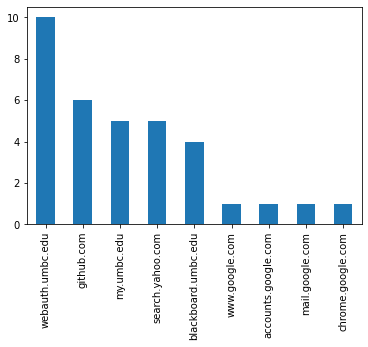

In [135]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [136]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
13    19
16     7
17     8
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

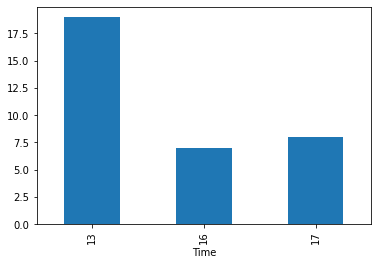

In [137]:
hourly_counts.plot.bar()

In [138]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-04-17 16:07:06,blackboard.umbc.edu,Sunday,6
1,2022-04-17 16:07:08,blackboard.umbc.edu,Sunday,6
2,2022-04-17 16:07:08,webauth.umbc.edu,Sunday,6
3,2022-04-17 16:07:08,webauth.umbc.edu,Sunday,6
4,2022-04-17 16:07:10,webauth.umbc.edu,Sunday,6


In [139]:
df['Day'].value_counts()

Tuesday    27
Sunday      7
Name: Day, dtype: int64

In [140]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

1    27
6     7
Name: DayIndex, dtype: int64

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (7).

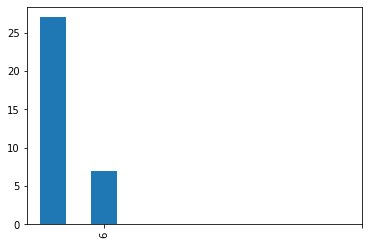

In [141]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [ ]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

In [151]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


KeyError: 'isWeekend'

In [152]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-04-17 16:06:17,www.google.com,Sunday,6,True
1,2022-04-17 16:06:21,www.check-plagiarism.com,Sunday,6,True
2,2022-04-17 16:07:06,blackboard.umbc.edu,Sunday,6,True
3,2022-04-17 16:07:08,blackboard.umbc.edu,Sunday,6,True
4,2022-04-17 16:07:08,webauth.umbc.edu,Sunday,6,True


In [153]:
weekday['domain'].value_counts()[:5]

webauth.umbc.edu       6
github.com             6
my.umbc.edu            5
search.yahoo.com       5
blackboard.umbc.edu    2
Name: domain, dtype: int64

In [154]:
weekend['domain'].value_counts()[:5]

www.google.com              4
webauth.umbc.edu            4
blackboard.umbc.edu         2
www.chegg.com               2
www.check-plagiarism.com    1
Name: domain, dtype: int64

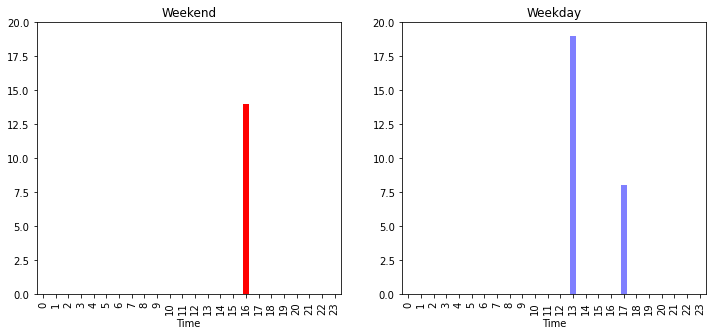

In [165]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 20])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [156]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

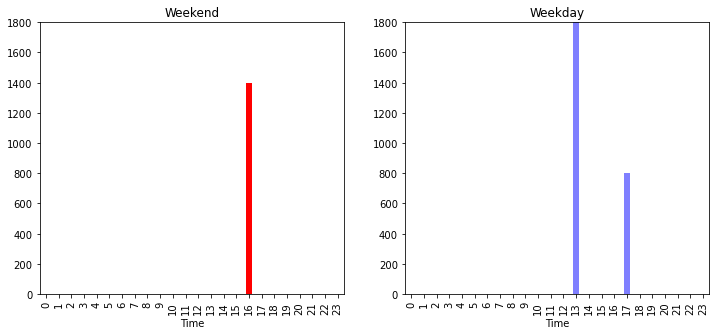

In [157]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [158]:
df['domain'].value_counts()[:10]

webauth.umbc.edu       10
github.com              6
my.umbc.edu             5
search.yahoo.com        5
blackboard.umbc.edu     4
www.google.com          1
accounts.google.com     1
mail.google.com         1
chrome.google.com       1
Name: domain, dtype: int64

In [159]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [160]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

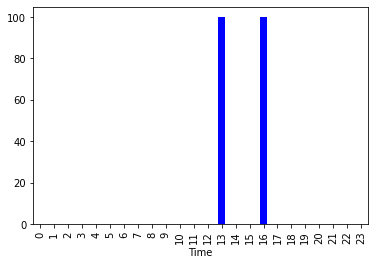

In [161]:
_= show_domain_stats('blackboard.umbc.edu', 'blue')

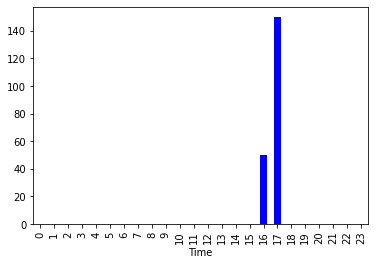

In [162]:
_= show_domain_stats('google', 'blue')

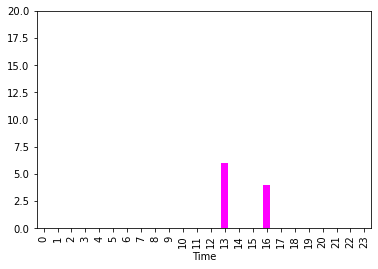

In [166]:
_ = show_domain_stats('webauth.umbc', 'magenta')


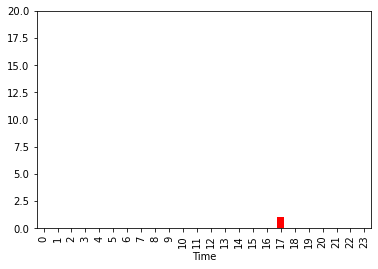

In [168]:
_ = show_domain_stats('mail.google', 'red')

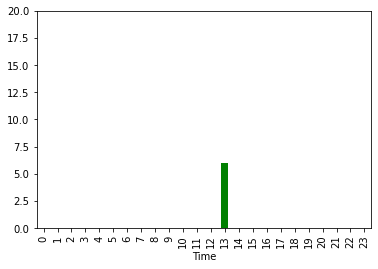

In [170]:
_ = show_domain_stats('github', 'green')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

### Answers
1. he seems to be having online courses/classes and its his work computer
2. he is a student as we can see him visiting his university website them most
3. he is particularly accessing his github and mail several times 

